# Tree Classifier
Welcome to the tree classifier notebook!

In [1]:
#These are the needed modules

import sys
#change these paths to where they are located on your computer
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/Actual Trees")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import Atree
import math
%matplotlib inline

## Getting the data
Get the data and reformat it for easier use.

In [2]:
# IF THIS IS YOUR FIRST TIME RUNNING TREE CLASSIFIER, UNCOMMENT THESE 2 LINES. ELSE, LEAVE THEM COMMENTED



# tree_data = Atree.data_util.pandas_non_missing()
# pickle.dump(tree_data, open('.././trees/tree_data.csv', 'wb'))

In [3]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [4]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

## Convert the data into a usable format
Organize the data into the format needed to preform classification

In [5]:
def splitTrees(location) :
    """
    splitTrees is used to quickly and efficiently split the data into usable chunks

    Parameters:
    -----------
    location: string
        the name of the location where the tree is from, matches exactly with the trees dataset, and is a string

    Return:
    -------
    splitTrees returns 2 lists of equal size that contain proper training and testing data

    """
    
    ind = np.where(trees['location']==location)[0]
    
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,totalTrees-1,totalTrees)
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        neuron.geometrical_features()
        neuron.motif_features()
        train[i] = neuron.getNeuronVector()
    
#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.l_measure_features()
        neuron.geometrical_features()
        neuron.motif_features()
        test[i] = neuron.getNeuronVector()
        
    return train,test

In [6]:
totalTrees = 20
size = int(totalTrees/2)

trainG, testG = splitTrees('Gabon')
print('done')
trainH, testH = splitTrees('Ghana')
print('done')
trainU, testU = splitTrees('UK')
print('done')
trainW, testW = splitTrees('Wytham Meteoc (UK)')
print('done')

done
done
done
done


## Classification
Use the data to train a classifier, and then test its accuracy

In [9]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model

In [7]:
def subsetData(arr,q):
    """
    subsetData is used to split the data into lists with only 1 classifying feature in order to test how important each feature is individually for classification

    Parameters:
    -----------
    arr: array or list
        the master array that contains all the features
    q: int
        the index of the desired feature

    Return:
    -------
    subsetData returns an array with only 1 classifying feature

    """
    
    x = [0] * size
    for i in range(0,size) :
        x[i] = arr[i][q]
    return x

In [19]:
"""
This for loop iterates through all of the feaures and prints the accuracy
"""
for q in range(0,31) :
    a = subsetData(trainG,q)
    b = subsetData(trainH,q)
    c = subsetData(trainU,q)
    d = subsetData(trainW,q)
    e = subsetData(testG,q)
    f = subsetData(testH,q)
    g = subsetData(testU,q)
    h = subsetData(testW,q)
    train = np.expand_dims(np.concatenate((a,b,c,d)),axis=1)
    test = np.expand_dims(np.concatenate((e,f,g,h)),axis=1)

    y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))
    clf = BaggingClassifier(RandomForestClassifier())
    clf.fit(train,y)
    z = clf.predict(test)
    sum = 0
    parts = 4
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
    accuracy = sum / len(z)
    print(accuracy,q)

0.6 0
0.55 1
0.525 2
0.25 3
0.25 4
0.225 5
0.175 6
0.55 7
0.5 8
0.65 9
0.5 10
0.425 11
0.625 12
0.625 13
0.575 14
0.35 15
0.575 16
0.575 17
0.55 18
0.575 19
0.6 20
0.55 21
0.65 22
0.85 23
0.475 24
0.45 25
0.55 26
0.4 27
0.75 28
0.55 29
0.575 30


In [8]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for l in range (0,length) :
        trainG, testG = splitTrees('Gabon')
        trainH, testH = splitTrees('Ghana')
        trainU, testU = splitTrees('UK')
        trainW, testW = splitTrees('Wytham Meteoc (UK)')
        print('done')

        for q in range(0,featureNum) :
            a = subsetData(trainG,q)
            b = subsetData(trainH,q)
            c = subsetData(trainU,q)
            d = subsetData(trainW,q)
            e = subsetData(testG,q)
            f = subsetData(testH,q)
            g = subsetData(testU,q)
            h = subsetData(testW,q)
            train = np.expand_dims(np.concatenate((a,b,c,d)),axis=1)
            test = np.expand_dims(np.concatenate((e,f,g,h)),axis=1)

            y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))
            clf = BaggingClassifier(RandomForestClassifier())
            clf.fit(train,y)
            z = clf.predict(test)
            sum = 0
            parts = 4
            for i in range (0,parts) :
                for j in range (0,size) :
                    if z[j + size*i] == i :
                        sum += 1
            accuracy = sum / len(z)
            masterFeature[q, l] = accuracy
        print(l)
    return masterFeature

In [20]:
totalTrees = 20
size = int(totalTrees/2)

featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNum = len(featureNames)

masterFeature = getFeatureImportance(3, featureNum)

done
0
done
1
done
2


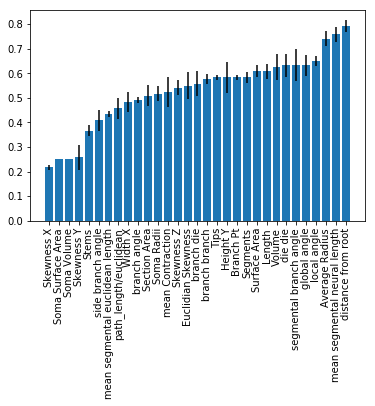

In [22]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""

values = np.zeros([3,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeature[i,:].mean()
    values[1,i] = masterFeature[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
values[2] = index
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTree.eps', dpi=300, bbox_inches = 'tight')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTree.png', dpi=300, bbox_inches = 'tight')

In [7]:
"""
Convert the lists into numpy arrays and concatenate them to create 1 big test and train array
"""

trainG = np.vstack(trainG)
trainH = np.vstack(trainH)
trainU = np.vstack(trainU)
trainW = np.vstack(trainW)
testG = np.vstack(testG)
testH = np.vstack(testH)
testU = np.vstack(testU)
testW = np.vstack(testW)


train = np.concatenate((trainG,trainH,trainU,trainW))
test = np.concatenate((testG,testH,testU,testW))
y = np.concatenate(([0] * size,[1] * size,[2] * size,[3] * size))

In [10]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
clf = BaggingClassifier(RandomForestClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [14]:
"""
Train the classifier and print the accuracy
"""
accuracy = 0
while accuracy < 0.976 :
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 4
    for i in range (0,parts) :
        for j in range (0,size) :
            if z[j + size*i] == i :
                sum += 1
            #else :
                #print(j + size*i)
    accuracy = sum / len(z)
    print(sum, accuracy)

40 1.0


## Data Visualization
Plot the results and the data to get a better understanding of the classification

11
9
10
10


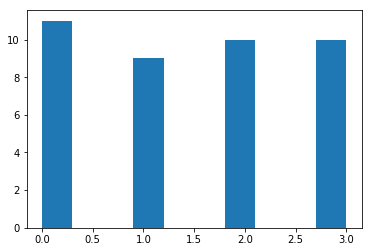

In [71]:
"""
This histogram gives you the breakdown of what the classifier predicted on the test values
"""

plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))
print(len(np.where(z == 2)[0]))
print(len(np.where(z == 3)[0]))

### TSNE
Visualize the training data using TSNE

[t-SNE] Computing 39 nearest neighbors...
[t-SNE] Indexed 40 samples in 0.003s...
[t-SNE] Computed neighbors for 40 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 40 / 40
[t-SNE] Mean sigma: 9352.766863
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 45.3084450, gradient norm = 0.7516973 (50 iterations in 0.039s)
[t-SNE] Iteration 100: error = 46.3263741, gradient norm = 0.5268337 (50 iterations in 0.027s)
[t-SNE] Iteration 150: error = 46.3484955, gradient norm = 0.6647321 (50 iterations in 0.027s)
[t-SNE] Iteration 200: error = 46.2311935, gradient norm = 0.4413175 (50 iterations in 0.027s)
[t-SNE] Iteration 250: error = 48.5211105, gradient norm = 0.4865400 (50 iterations in 0.024s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.521111
[t-SNE] Iteration 300: error = 0.7021141, gradient norm = 0.0010599 (50 iterations in 0.024s)
[t-SNE] Iteration 350: error = 0.6347494, gradient norm = 0.0002851 (5

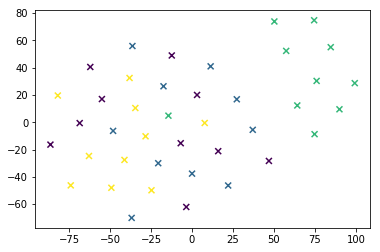

In [27]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
#plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeClassificationTSNE.eps')

### PCA
Visualize the training data using PCA

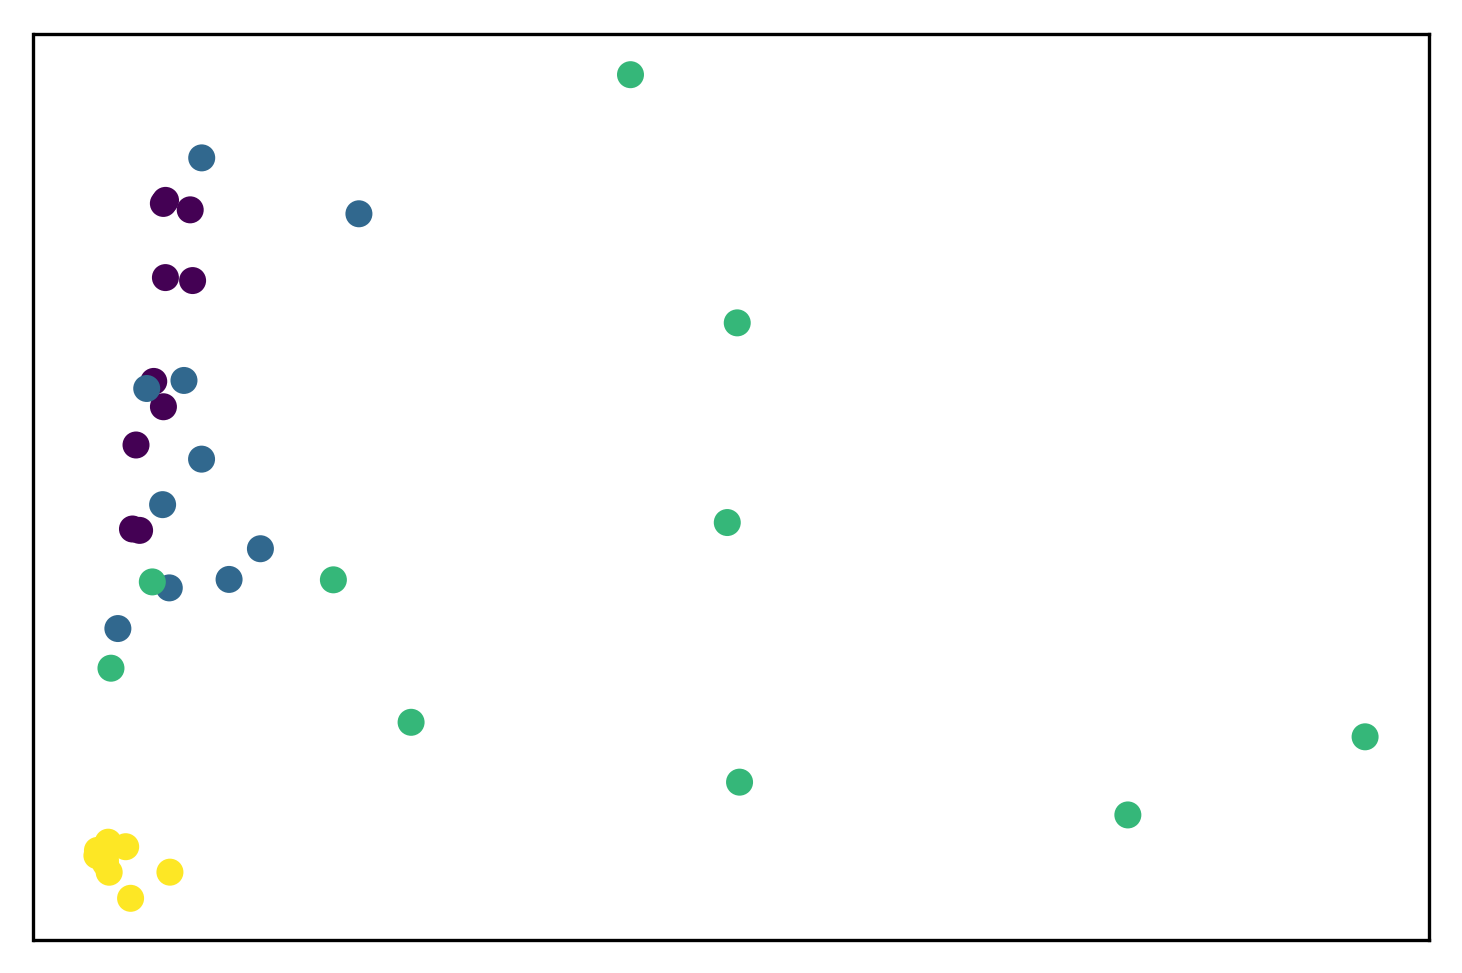

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

fig,ax = plt.subplots(1)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y, s=30)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
# ax.axis([-6000,20000,-1000,1000])
fig.dpi=300
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeClassificationPCA.eps')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeClassificationPCA.png')

In [6]:
import pickle
treeBranchMasterG = pickle.load(open('treeBranchMasterG','rb'))
treeBranchMasterH = pickle.load(open('treeBranchMasterH','rb'))
treeBranchMasterU = pickle.load(open('treeBranchMasterU','rb'))
treeBranchMasterW = pickle.load(open('treeBranchMasterW','rb'))

In [47]:
def removeBranchNaN(arr) :
    for i in range(0,len(arr)) :
        counter = 0
        for j in range(0,len(arr[i])) :
            if np.isnan(arr[i][j-counter]).any() :
                arr[i] = np.delete(arr[i],j-counter, axis=0)
                counter += 1
#                 print('good')
    return arr

treeBranchMasterG = removeBranchNaN(treeBranchMasterG)
treeBranchMasterH = removeBranchNaN(treeBranchMasterH)
treeBranchMasterU = removeBranchNaN(treeBranchMasterU)
treeBranchMasterW = removeBranchNaN(treeBranchMasterW)

In [11]:
sum = 0
total = 0
for i in range (0,len(treeBranchMasterG)) :
    z = clf.predict(treeBranchMasterG[i])
    sum += len(np.where(z==0)[0])
    total += len(z)
print(sum/total, sum, total)

sum = 0
total = 0
for i in range (0,len(treeBranchMasterH)) :
    z = clf.predict(treeBranchMasterH[i])
    sum += len(np.where(z==1)[0])
    total += len(z)
print(sum/total, sum, total)

sum = 0
total = 0
for i in range (0,len(treeBranchMasterU)) :
    z = clf.predict(treeBranchMasterU[i])
    sum += len(np.where(z==2)[0])
    total += len(z)
print(sum/total, sum, total)

sum = 0
total = 0
for i in range (0,len(treeBranchMasterW)) :
    z = clf.predict(treeBranchMasterW[i])
    sum += len(np.where(z==3)[0])
    total += len(z)
print(sum/total, sum, total)

NotFittedError: This BaggingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [8]:
def appendtrees(arr) :
    branchMaster = arr[0]
    for i in range(1, len(arr)):
        branchMaster = np.append(branchMaster, arr[i],axis=0)

    return branchMaster

In [9]:
branchG = appendtrees(treeBranchMasterG)
branchH = appendtrees(treeBranchMasterH)
branchU = appendtrees(treeBranchMasterU)
branchW = appendtrees(treeBranchMasterW)

In [10]:
X = np.concatenate((branchG, branchH, branchU, branchW))
y = np.concatenate(([0] * len(branchG),[1] * len(branchH),[2] * len(branchU),[3] * len(branchW)))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import linear_model

In [13]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
#clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
clf = BaggingClassifier(RandomForestClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = linear_model.LinearRegression()

In [14]:
accuracy = 0
clf.fit(X_train,y_train)
z = clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(z, y_test)

0.8860413111281116

4534
8984
54110
344


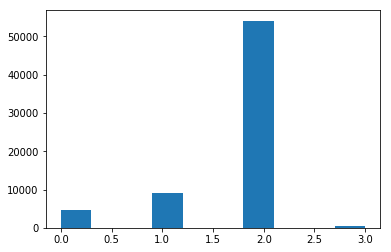

In [17]:
plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))
print(len(np.where(z == 2)[0]))
print(len(np.where(z == 3)[0]))

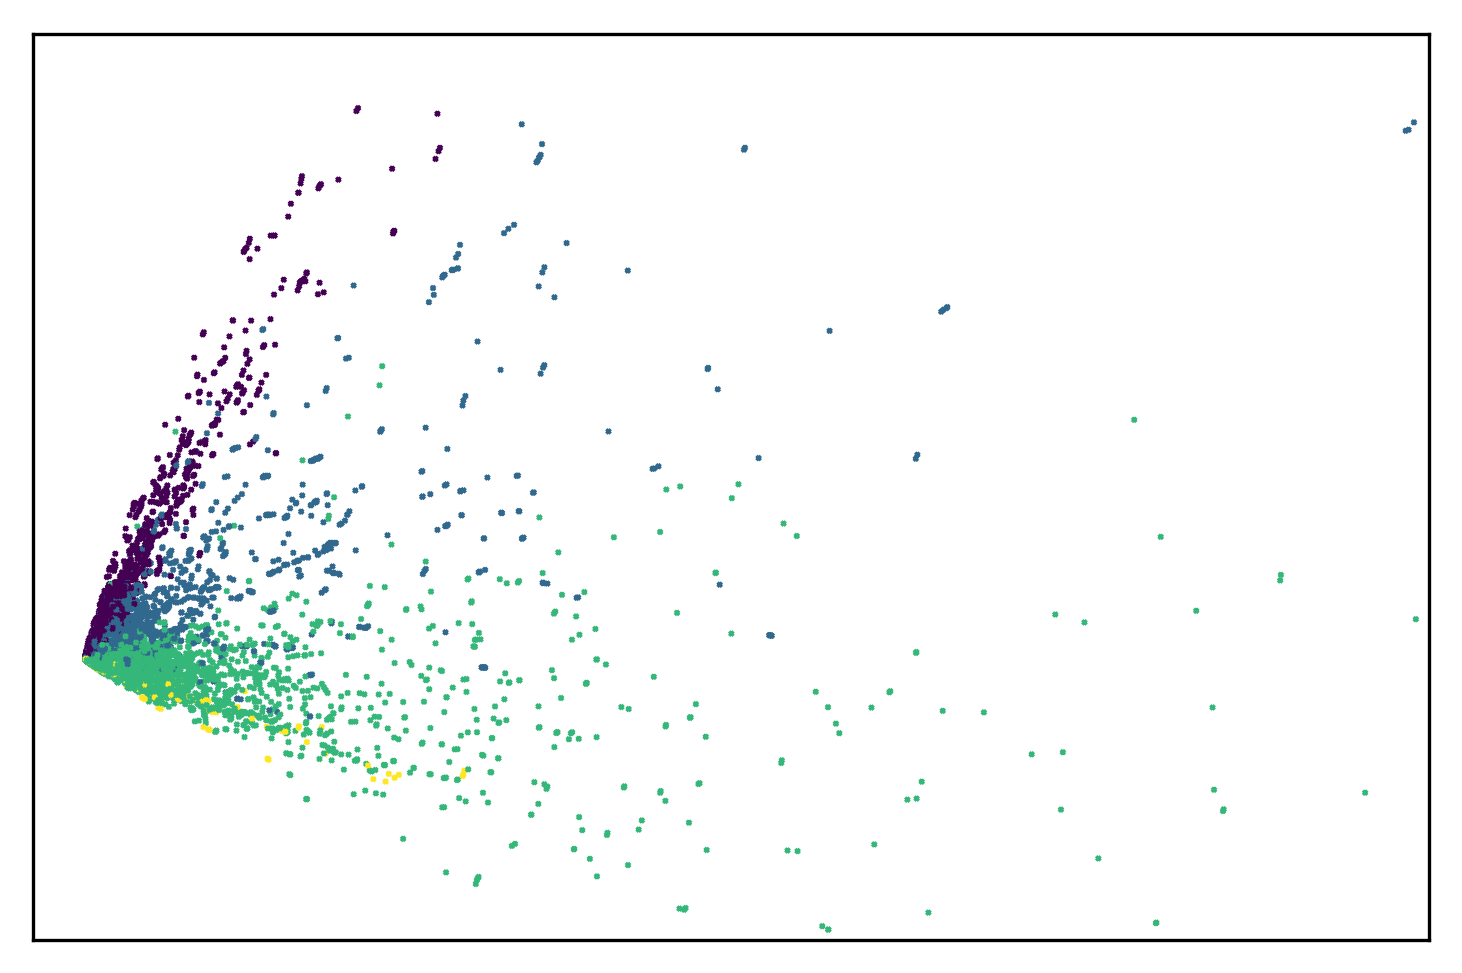

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train,y_train)
X_embedded = pca.fit_transform(X_train,y_train)

fig,ax = plt.subplots(1)
ax.scatter(X_embedded[:,0], X_embedded[:,1], c=y_train, s=.3, marker='x')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])
ax.axis([-500,10000,-500,1100])
fig.dpi=300
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeBranchClassificationAllPCA.eps', dpi = 300)
# fig.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeBranchClassificationAllPCA.png', dpi = 300)

In [25]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 67971 samples in 0.715s...
[t-SNE] Computed neighbors for 67971 samples in 95.447s...
[t-SNE] Computed conditional probabilities for sample 1000 / 67971
[t-SNE] Computed conditional probabilities for sample 2000 / 67971
[t-SNE] Computed conditional probabilities for sample 3000 / 67971
[t-SNE] Computed conditional probabilities for sample 4000 / 67971
[t-SNE] Computed conditional probabilities for sample 5000 / 67971
[t-SNE] Computed conditional probabilities for sample 6000 / 67971
[t-SNE] Computed conditional probabilities for sample 7000 / 67971
[t-SNE] Computed conditional probabilities for sample 8000 / 67971
[t-SNE] Computed conditional probabilities for sample 9000 / 67971
[t-SNE] Computed conditional probabilities for sample 10000 / 67971
[t-SNE] Computed conditional probabilities for sample 11000 / 67971
[t-SNE] Computed conditional probabilities for sample 12000 / 67971
[t-SNE] Computed conditional probabilities for sa

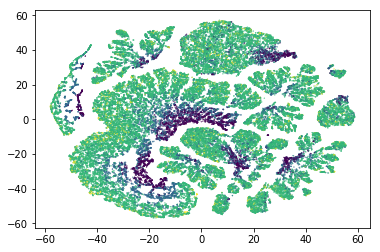

In [42]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = y_train, s=0.1)
#plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/treeBranchClassificationAllTSNE.eps', dpi = 300)

In [56]:
def getBranchFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for l in range (0,length) :
        for q in range(0,featureNum) :
            
            X_train, X_test, y_train, y_test = train_test_split(X[:,q], y, test_size=0.5, random_state=42)
            X_train = np.expand_dims(X_train,axis=1)
            X_test = np.expand_dims(X_test,axis=1)

            clf = ExtraTreesClassifier()
            clf.fit(X_train,y_train)
            z = clf.predict(X_test)
            masterFeature[q, l] = accuracy_score(z, y_test)
#             if q%10==0 :
#                 print(q)
        print(l)
    return masterFeature

In [57]:
featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from root', 'path_length/euclidean', \
                'mean Contraction', 'branch angle', 'side branch angle', \
                'mean segmental neural length', 'mean segmental euclidean length', \
                'segmental branch angle']
featureNum = len(featureNames)
masterFeatureBranch = getBranchFeatureImportance(10, featureNum)

0
1
2
3
4
5
6
7
8
9


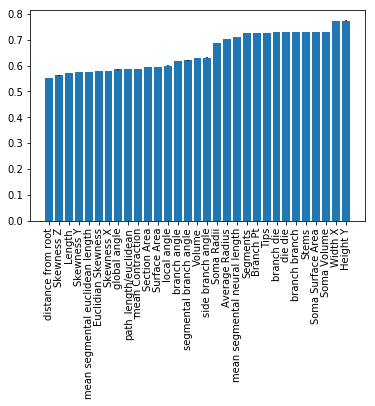

In [58]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""
values = np.zeros([2,featureNum])
for i in range(0,featureNum) :
    values[0,i] = masterFeatureBranch[i,:].mean()
    values[1,i] = masterFeatureBranch[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeBranch.eps', dpi=300, bbox_inches = 'tight')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Images/featureImportanceTreeBranch.png', dpi=300, bbox_inches = 'tight')